# Домашнее задание

Домашнее задание по дисциплине направлено на решение комплексной задачи машинного обучения. Домашнее задание включает выполнение следующих шагов:

1. Поиск и выбор набора данных для построения моделей машинного обучения. На основе выбранного набора данных студент должен построить модели машинного обучения для решения или задачи классификации, или задачи регрессии.
1. Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.
1. Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.
1. Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения. В зависимости от набора данных, порядок выполнения пунктов 2, 3, 4 может быть изменен.
1. Выбор метрик для последующей оценки качества моделей. Необходимо выбрать не менее двух метрик и обосновать выбор.
1. Выбор наиболее подходящих моделей для решения задачи классификации или регрессии. Необходимо использовать не менее трех моделей, хотя бы одна из которых должна быть ансамблевой.
1. Формирование обучающей и тестовой выборок на основе исходного набора данных.
1. Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.
1. Подбор гиперпараметров для выбранных моделей. Рекомендуется подбирать не более 1-2 гиперпараметров. Рекомендуется использовать методы кросс-валидации. В зависимости от используемой библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.
1. Повторение пункта 8 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.
1. Формирование выводов о качестве построенных моделей на основе выбранных метрик.

## Выбор датасета

Выбранный датасет: [Glass Classification
](https://www.kaggle.com/uciml/glass)

Атрибуты означают следующее:

1. Id number: 1 to 214 (removed from CSV file)
1. RI: refractive index
1. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
1. Mg: Magnesium
1. Al: Aluminum
1. Si: Silicon
1. K: Potassium
1. Ca: Calcium
1. Ba: Barium
1. Fe: Iron
1. Type of glass: (class attribute) 
   - 1 building_windows_float_processed 
   - 2 building_windows_non_float_processed
   - 3 vehicle_windows_float_processed 
   - 4 vehicle_windows_non_float_processed (none in this database)
   - 5 containers 
   - 6 tableware 
   - 7 headlamps
   
## Загрузка датасета

In [0]:
# Подключение Google диска для загрузки датасета
from google.colab import drive
drive.mount('/gdrive')
%load_ext tensorboard.notebook

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
The tensorboard.notebook extension is already loaded. To reload it, use:
  %reload_ext tensorboard.notebook


## Проверка и удаление пропусков

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
os.listdir()
data = pd.read_csv('/gdrive/My Drive/Colab Notebooks/ММО/lab5/glass.csv',
                   sep=",")
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [0]:
data.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [0]:
data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [0]:
data.shape

(214, 10)

## Разведочный анализ и предварительная обработка данных

In [0]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


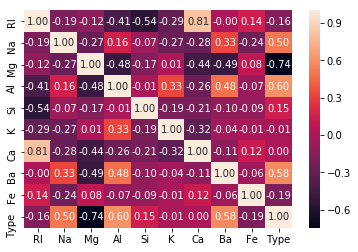

In [0]:
sns.heatmap(data.corr(method='pearson'), annot=True, fmt='.2f')

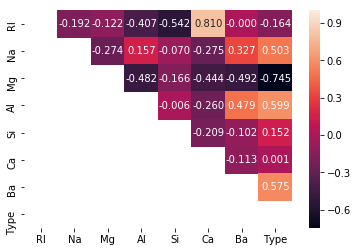

In [0]:
corr = data.corr()
m = (corr.mask(np.eye(len(corr), dtype=bool)).abs() > 0.5).any()
raw = corr.loc[m, m]
# Треугольный вариант матрицы
mask = np.zeros_like(raw, dtype=np.bool)
# чтобы оставить нижнюю часть матрицы
# mask[np.triu_indices_from(mask)] = True
# чтобы оставить верхнюю часть матрицы
mask[np.tril_indices_from(mask)] = True
sns.heatmap(raw, mask=mask, annot=True, fmt='.3f')

Заметим следующее:

Тип стекла имеет коррелирует  с показателями Na, Mg, Al, Ba


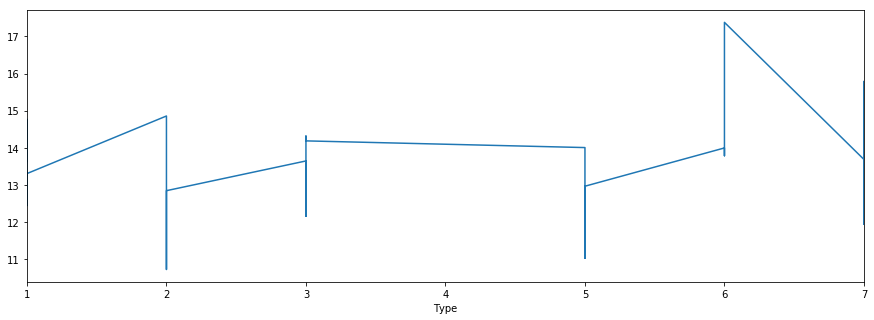

In [0]:
data.set_index('Type')['Na'].plot(figsize=(15, 5))

In [0]:
data = data.drop(['RI', 'Si', 'K', 'Ca', 'Fe'], axis=1)

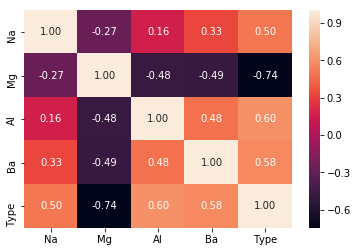

In [0]:
sns.heatmap(data.corr(method='pearson'), annot=True, fmt='.2f')

Будем обучать выявление типа стекла по параметрам Na, Mg, Al, Ba.

In [0]:
type_ohe = pd.get_dummies(data['Type'], prefix='type', 
                             drop_first=True)

## Выбор метрик

Для оценки качества моделей будем использовать следующие метрики:

* **Средняя абсолютная ошибка** - по ней легко судить о средней оценке ошибки;
* **Медиана абсолютной ошибки** - другая средняя оценка ошибки, для дополнительной оценки средней абсолютной;
* **Объяснимая вариация** - вариация изучаемого признака, зависящая от значений признака, положенного в основу.

In [0]:
from sklearn.metrics import explained_variance_score, \
mean_absolute_error, median_absolute_error

## Выбор моделей

В качестве простой модели используем линейную модель стохастического градиентного спуска, у которого будем менять функцию потерь ($loss$) и скорость обучения ($learning rate$)

In [0]:
from sklearn.linear_model import SGDRegressor

В качестве более сложной модели используем дерево решений, у которого изначально поставим $max depth = 3$.

In [0]:
from sklearn.tree import DecisionTreeRegressor

Из ансамблевых моделей воспользуемся случайным лесом с исходными $n estimators = 10$ и $max depth = 3$.

In [0]:
from sklearn.ensemble import RandomForestRegressor

## Разделение выборки на обучающую и тестовую

In [0]:
from sklearn.model_selection import train_test_split
temperature = data['Type']
input_data = data.drop(['Type'], axis=1)
data_X_train, data_X_test, data_y_train, data_y_test = train_test_split(
    input_data, temperature, test_size=0.2, random_state=1)

## Базовое решение (baseline)

Для начала предварительно подготовим класс Regressor, который будет собирать необходимые параметры для обучения:

In [0]:
template_header = "Модель {}"
template = "Значение по метрике {}:  {:.2%}"

class Regressor():
  def __init__(self, method, metrics, x_train, y_train, x_test, y_test):
    self._method = method
    self.x_train = x_train
    self.y_train = y_train
    self.x_test = x_test
    self.y_test = y_test
    self._metrics = metrics
    self.target_1 = []
    
  def training(self):
    self._method.fit(self.x_train, self.y_train)
    self.target_1 = self._method.predict(self.x_test)
    
  def result(self):
    print(template_header.format(self._method))
    for metric in self._metrics:
      print(template.format(metric.__name__, 
                            metric(self.y_test, self.target_1)))

In [0]:
choosed_metrics = [explained_variance_score, 
                   mean_absolute_error, 
                   median_absolute_error]
choosed_models = [SGDRegressor(), 
                  DecisionTreeRegressor(max_depth=3), 
                  RandomForestRegressor(n_estimators=10, max_depth=3)]

Обучим выбранные модели и проверим выбранными метриками.

In [0]:
for model in choosed_models:
  regressor = Regressor(model, choosed_metrics, data_X_train, 
                        data_y_train, data_X_test, data_y_test)
  regressor.training()
  regressor.result()

Модель SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)
Значение по метрике explained_variance_score:  55.26%
Значение по метрике mean_absolute_error:  84.88%
Значение по метрике median_absolute_error:  54.02%
Модель DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
Значение по метрике explained_variance_score:  68.14%
Значение по метрике mean_a

## Подбор гиперпараметра K с использованием GridSearchCV и кросс-валидации

In [0]:
from sklearn.model_selection import ShuffleSplit
choosed_cv = ShuffleSplit(n_splits=5, test_size=0.25)

tuned_parameters_1 = [{'loss': ['squared_loss', 'huber', 'epsilon_insensitive', 
                         'squared_epsilon_insensitive'], 
                        'learning_rate':['constant', 'optimal', 'invscaling']}]
n_range = np.array(range(2,11,1))
tuned_parameters_2 = [{'max_depth': n_range}]
n_range2 = np.array(range(5, 45, 5))
tuned_parameters_3 = [{'n_estimators': n_range2, 'max_depth': n_range}]

In [0]:
from sklearn.model_selection import GridSearchCV

rg_sgd_gs = GridSearchCV(SGDRegressor(), tuned_parameters_1, 
                         cv=choosed_cv, scoring='explained_variance')
rg_sgd_gs.fit(data_X_train, data_y_train)
rg_sgd_gs.best_params_

{'learning_rate': 'invscaling', 'loss': 'squared_loss'}

In [0]:
rg_dtr_gs = GridSearchCV(DecisionTreeRegressor(), tuned_parameters_2, 
                         cv=choosed_cv, scoring='explained_variance')
rg_dtr_gs.fit(data_X_train, data_y_train)
rg_dtr_gs.best_params_

{'max_depth': 2}

In [0]:
rg_rfr_gs = GridSearchCV(RandomForestRegressor(), tuned_parameters_3, 
                         cv=choosed_cv, scoring='explained_variance')
rg_rfr_gs.fit(data_X_train, data_y_train)
rg_rfr_gs.best_params_

{'max_depth': 6, 'n_estimators': 15}

## Сравнение модели с произвольным и лучшим параметром K

Обучим модели на исходных гиперпараметрах и оптимизированных гиперпараметрах.

In [0]:
choosed_and_optimized_models = [SGDRegressor(),
                                SGDRegressor(learning_rate='invscaling',
                                            loss='squared_loss'),
                                DecisionTreeRegressor(max_depth=3),
                                DecisionTreeRegressor(max_depth=2),
                                RandomForestRegressor(n_estimators=10, 
                                                      max_depth=3),
                                RandomForestRegressor(n_estimators=15, 
                                                      max_depth=6)
                               ]

In [0]:
for model in choosed_and_optimized_models:
  regressor = Regressor(model, choosed_metrics, data_X_train, 
                        data_y_train, data_X_test, data_y_test)
  regressor.training()
  regressor.result()
  print('-'*50)

Модель SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)
Значение по метрике explained_variance_score:  55.96%
Значение по метрике mean_absolute_error:  97.82%
Значение по метрике median_absolute_error:  83.87%
--------------------------------------------------
Модель SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             war

## Выводы

По полученным моделям и значениям можно сделать следующие выводы:

* Регрессор градиентного спуска имел наилучшую конфигурацию при стандартных настройках;
* Регрессор показал себя хуже всего в обучении;
* Для DecisionTreeRegressor и RandomForestRegressor критично задавать оптимальные гиперпараметры, это улучшает точность на порядок;
* Наилучшим образом себя показала модель на RandomForestRegressor без ансамблевого метода. Она объясняет 69.17% всей вариации признака температуры, что является хорошим показателем.